<a href="https://colab.research.google.com/github/kingketan9/ApplicationsOfAI-Labs/blob/main/ComputerVisionAss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

!pip show mtcnn

# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: mtcnn
Version: 0.1.1
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: keras, opencv-python
Required-by: 
0.1.0


# face detection with mtcnn on a photograph

In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# load image from file
filename = 'test1.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

1/1 [==============================] - 0s 202ms/step
{'box': [373, 83, 100, 129], 'confidence': 0.9998095035552979, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993303418159485, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


# draw an image with detected objects

In [ ]:
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in result_list:
  # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # show the plot
    pyplot.show()

1/1 [==============================] - 0s 300ms/step


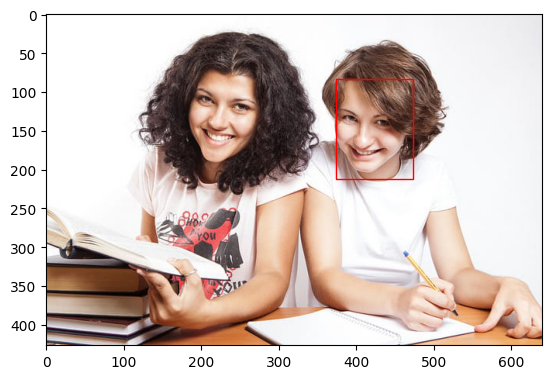

In [ ]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

3/3 [==============================] - 0s 35ms/step


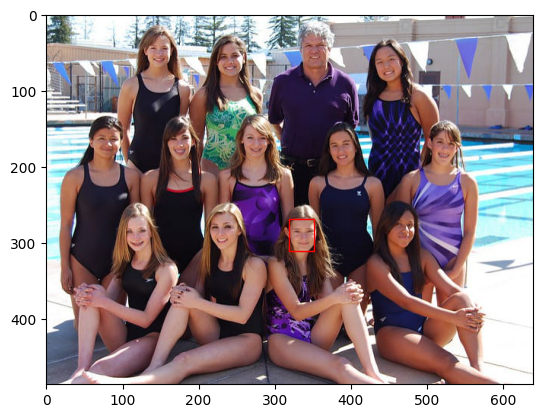

In [ ]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

# face detection with mtcnn on a photograph


In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [ ]:
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in result_list:
  # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # draw the dots
    for key, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)

  # show the plot

  pyplot.show()

1/1 [==============================] - 0s 210ms/step


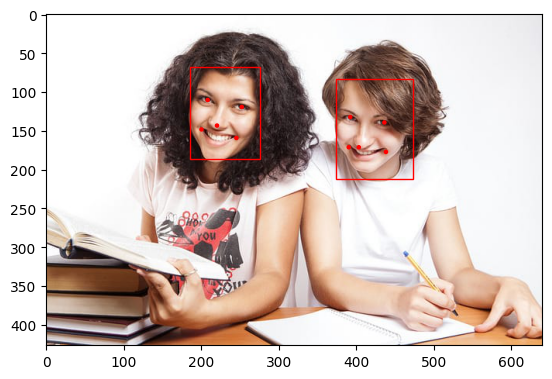

In [ ]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

3/3 [==============================] - 1s 92ms/step


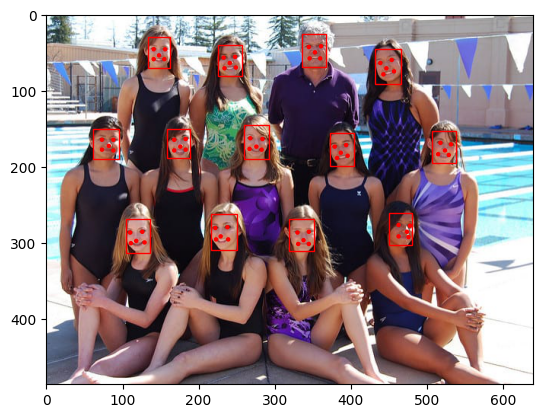

In [ ]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

# extract and plot each detected face in a photograph

In [ ]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately

In [ ]:
def draw_faces(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot each face as a subplot
  for i in range(len(result_list)):
    # get coordinates
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    # define subplot
    pyplot.subplot(1, len(result_list), i+1)
    pyplot.axis('off')
    # plot face
    pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()

1/1 [==============================] - 0s 404ms/step


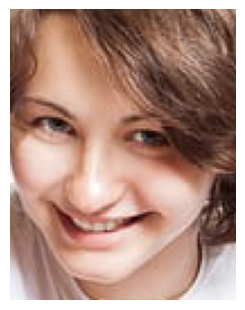

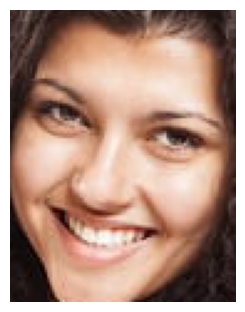

In [ ]:
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

3/3 [==============================] - 0s 47ms/step


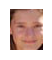

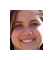

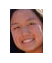

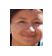

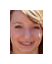

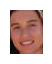

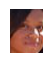

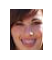

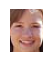

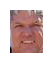

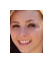

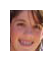

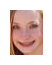

In [ ]:
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

#Assignment-1

Detect faces from live images taken from webcam.

In [ ]:
import cv2

imagename = 'test2.jpg'
img = cv2.imread(imagename)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

#Assignment-2

Once you're done with images, then take short live video sequence and detect faces.

In [ ]:
import os
import time

def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

while True:
    
    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully

    faces = detect_bounding_box(
        video_frame
    )  # apply the function we created to the video frame

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  # display the processed frame in a window named "My Face Detection Project"

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()

#Assignment-3

Detect faces in mask wearing images.

1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 172ms/step


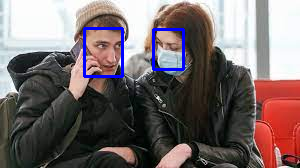

In [ ]:
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained face detector model
face_detector = MTCNN()

# Load the mask wearing image
image = cv2.imread('mask_wearing_image.jpeg')

# Detect faces in the image
faces = face_detector.detect_faces(image)

# Draw rectangles around the detected faces
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with detected faces
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()